## Spitogatos Data Analysis Assignment

### Name: Nikolaos Gkizelis

* We start by importing the necessary libraries.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* We firt read the `assignment_rev2.csv` file which is located in the folder `data`.
* We look at the shape of the dataframe and the first five observations.

In [70]:
df = pd.read_csv('data/assignment_rev2.csv')
print("The shape of the dataframe is:", df.shape)
print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

The shape of the dataframe is: (15447, 56)
The dataframe contains 15447 rows and 56 columns.


,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,...,False,True,False,True,True,False,False,True,False,True
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,False,True,False,True,True,False,False,False,False,False
4,39742998,126.7,14682.0,northern sub,195,370000,2007,ground-floor,maisonette,4,...,False,True,False,True,True,False,False,False,False,True


* We see some aggregated info regarding the dataframe.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15447 entries, 0 to 15446
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       15447 non-null  int64  
 1   ranking_score            15447 non-null  float64
 2   agent_id                 15343 non-null  float64
 3   geography_name           15447 non-null  object 
 4   sq_meters                15447 non-null  int64  
 5   price                    15447 non-null  int64  
 6   year_of_construction     15447 non-null  int64  
 7   floor                    14715 non-null  object 
 8   subtype                  15447 non-null  object 
 9   rooms                    15447 non-null  int64  
 10  no_of_bathrooms          15447 non-null  int64  
 11  energy_class             2107 non-null   object 
 12  renovation_year          2067 non-null   float64
 13  no_of_wc                 15447 non-null  int64  
 14  ad_type               

* We then take a look of the NA values in our dataset for each column.

In [72]:
df.isna().sum()

id                             0
ranking_score                  0
agent_id                     104
geography_name                 0
sq_meters                      0
price                          0
year_of_construction           0
floor                        732
subtype                        0
rooms                          0
no_of_bathrooms                0
energy_class               13340
renovation_year            13380
no_of_wc                       0
ad_type                        0
living_rooms                   0
kitchens                       0
balcony_area                   0
lux_home                    4238
new_development             3606
garage                      1630
furnished                   4169
preserved                   5433
investment                  4964
unfinished                  5420
equipped                   15447
heating_under_floor         4677
renovated                   4329
requires_renovation         4882
airy                        3518
bright    

* We check the `dtypes` of our variables-columns.
* Some of them are `int64`, `float64` and `object`.

In [73]:
df.dtypes

id                           int64
ranking_score              float64
agent_id                   float64
geography_name              object
sq_meters                    int64
price                        int64
year_of_construction         int64
floor                       object
subtype                     object
rooms                        int64
no_of_bathrooms              int64
energy_class                object
renovation_year            float64
no_of_wc                     int64
ad_type                     object
living_rooms                 int64
kitchens                     int64
balcony_area                 int64
lux_home                    object
new_development             object
garage                      object
furnished                   object
preserved                   object
investment                  object
unfinished                  object
equipped                   float64
heating_under_floor         object
renovated                   object
requires_renovation 

### Data Cleansing

* Now, we are ready to start cleaning our dataset.
* We will drop some rows containing missing values regarding some columns.
* We will also drop some redundant columns.
* Lastly, we will replace the missing values with the mean/median/mode of the respective column.


* We will drop rows containing missing values from the `agent_id` column.

In [74]:
df.dropna(subset=['agent_id'], axis=0, inplace=True)

* Since the `floor` column might be important for our analysis, we will treat it with special care.
* Let's see the unique values of the `floor` column along with their counts.
* We see that there are categorical values such as `ground-floor`, `basement`, `mezzanine` and `semi-basement`.

In [75]:
df['floor'].value_counts()

ground-floor     5089
1                3200
2                2127
3                1888
4                1241
5                 433
basement          176
mezzanine         169
semi-basement     144
6                 113
7                  28
8                   3
20                  1
11                  1
10                  1
Name: floor, dtype: int64

* We will replace the categorical values with the corresponding numerical values.

In [76]:
df['floor'].replace(['ground-floor', 'basement', 'mezzanine', 'semi-basement'], ['0', '-1', '1', '-1'], inplace=True)
df['floor'].value_counts()

0     5089
1     3369
2     2127
3     1888
4     1241
5      433
-1     320
6      113
7       28
8        3
20       1
11       1
10       1
Name: floor, dtype: int64

* We will convert the `floor` column to `int64` type after we replace the missing values with the mode of the column.

In [77]:
df['floor'].fillna(df['floor'].mode()[0], inplace=True)

In [78]:
df['floor'] = df['floor'].astype('int64')

* Next, we will drop some entire columns since the majority of the values are missing.

In [79]:
df.drop(columns=['energy_class', 'equipped', 'accessible_for_disabled'], axis=1, inplace=True)

* For each column which is an `object` type and specifically binary categorical, we will replace `True` with 1 and `False` with 0.
* Also, we will replace the missing values with the mode of the column.
* Lastly, we will convert the `object` type to `int64` type.

In [80]:
for column in df.columns:
    if (df[column].dtype == 'object') and (column not in ['geography_name', 'subtype', 'ad_type']):
        # replace True or False values with 1 or 0
        df[column].replace({True: 1, False: 0}, inplace=True)
        # fillna with mode
        df[column].fillna(df[column].mode()[0], inplace=True)
        # convert to int
        df[column] = df[column].astype('int64')

In [81]:
df.head()

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,0,1,0,1,1,0,0,0,0,0
1,43018583,134.7,15502.0,northern sub,642,550000,1992,0,detached,5,...,0,1,0,1,1,0,0,1,0,1
2,39670968,71.0,9807.0,northern sub,320,500000,2009,0,detached,2,...,0,1,0,1,1,0,0,0,0,0
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,0,1,0,1,1,0,0,0,0,0
4,39742998,126.7,14682.0,northern sub,195,370000,2007,0,maisonette,4,...,0,1,0,1,1,0,0,0,0,1


* For the `renovation_year` column the majority of the values are missing.
* However, this column might be important for our analysis.
* It would be good to have these values for our analysis.
* We could try to impute the missing values if we had more time for the assignment.
* But, we possess another column named `renovated`.

* If the `renovation_year` column has non-missing values, then the `renovated` column will have `True` values.
* Otherwise, it will have `False` values.

In [82]:
df['renovated'] = np.where(df['renovation_year'].isna(), 0, 1)

In [83]:
df.drop('renovation_year', axis=1, inplace=True)

In [84]:
df.head()

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,0,1,0,1,1,0,0,0,0,0
1,43018583,134.7,15502.0,northern sub,642,550000,1992,0,detached,5,...,0,1,0,1,1,0,0,1,0,1
2,39670968,71.0,9807.0,northern sub,320,500000,2009,0,detached,2,...,0,1,0,1,1,0,0,0,0,0
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,0,1,0,1,1,0,0,0,0,0
4,39742998,126.7,14682.0,northern sub,195,370000,2007,0,maisonette,4,...,0,1,0,1,1,0,0,0,0,1


In [85]:
df.shape

(15343, 52)

* Finally, we have cleaned our dataset from all missing values.

In [86]:
df.isna().sum()

id                      0
ranking_score           0
agent_id                0
geography_name          0
sq_meters               0
price                   0
year_of_construction    0
floor                   0
subtype                 0
rooms                   0
no_of_bathrooms         0
no_of_wc                0
ad_type                 0
living_rooms            0
kitchens                0
balcony_area            0
lux_home                0
new_development         0
garage                  0
furnished               0
preserved               0
investment              0
unfinished              0
heating_under_floor     0
renovated               0
requires_renovation     0
airy                    0
bright                  0
painted                 0
garden                  0
ac                      0
storage                 0
balcony                 0
internal_stairs         0
view                    0
secure_door             0
penthouse               0
alarm                   0
corner      

* For the `year_of_construction` column we will do some cleaning as well.

In [87]:
df['year_of_construction'].unique()

array([2005, 1992, 2009, 2007, 2011, 2010, 1993, 2008, 2155, 1994, 1976,
       1995, 2012, 1962, 1998, 2003, 2006, 1997, 1982, 1980, 1987, 1999,
       1985, 2004, 1960, 1967, 1961, 1974, 2000, 1983, 1963, 1978, 2015,
          0, 1979, 1958, 2019, 1996, 1972, 1990, 2017, 2002, 1973, 2016,
       1970, 1975, 1991, 2001, 1986, 2018, 1989, 2014, 1984, 1968, 1901,
       1988, 1969, 1940, 1981, 1965, 1959, 2013, 1977, 2020, 1914, 1966,
       1930, 1971, 1948, 1955, 1964, 1950, 1937, 1918, 1920, 1935, 1951,
       1957, 1932, 1936, 1929, 1934, 1952, 1910, 1019, 1070, 1925, 1945,
       1900, 1949, 1908, 1905, 1907, 1956, 1953, 1954, 1933, 1923, 1931,
       1927, 1943, 1928, 1947, 1939, 1938, 1915, 1946], dtype=int64)

In [88]:
(df.year_of_construction == 0).sum()

362

In [89]:
(df.year_of_construction == 2155).sum()

533

* We will assume that the years `2155` and `0` mean that the house is under construction.
* So, we will group these two values together. 

In [90]:
# replace the value of 2155 with 0 for the year_of_construction column
df['year_of_construction'].replace(2155, 0, inplace=True)

* We will now save our cleaned dataset to a new csv file named `cleaned_assignment_rev2.csv`.

In [91]:
df.to_csv('data/cleaned_assignment_rev2.csv', index=False)

## Assignment Part #1

* Now, we are ready to answer the firt part of the assignment.
* For this purpose, we will calculate the `price_per_sqm` column.

In [92]:
df = pd.read_csv("data/cleaned_assignment_rev2.csv")
df.head(5)

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,0,1,0,1,1,0,0,0,0,0
1,43018583,134.7,15502.0,northern sub,642,550000,1992,0,detached,5,...,0,1,0,1,1,0,0,1,0,1
2,39670968,71.0,9807.0,northern sub,320,500000,2009,0,detached,2,...,0,1,0,1,1,0,0,0,0,0
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,0,1,0,1,1,0,0,0,0,0
4,39742998,126.7,14682.0,northern sub,195,370000,2007,0,maisonette,4,...,0,1,0,1,1,0,0,0,0,1


In [93]:
df['price_per_sqm'] = round(df['price'] / df['sq_meters'], 2)
df.head()

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom,price_per_sqm
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,1,0,1,1,0,0,0,0,0,352.73
1,43018583,134.7,15502.0,northern sub,642,550000,1992,0,detached,5,...,1,0,1,1,0,0,1,0,1,856.70
2,39670968,71.0,9807.0,northern sub,320,500000,2009,0,detached,2,...,1,0,1,1,0,0,0,0,0,1562.50
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,1,0,1,1,0,0,0,0,0,2421.05
4,39742998,126.7,14682.0,northern sub,195,370000,2007,0,maisonette,4,...,1,0,1,1,0,0,0,0,1,1897.44


* We will calculate the mean, median and standard deviation of the `price_per_sqm` column per `subtype`.

In [94]:
round(df.groupby('subtype')['price_per_sqm'].agg(['mean', 'median', 'std']), 2)

,mean,median,std
subtype,,,
apartment,2860.42,2700.00,1412.76
apartment complex,2458.40,2066.23,1354.89
building,2184.52,1762.86,1460.11
bungalow,2216.67,2216.67,70.71
detached,3072.68,2571.43,1988.31
loft,4112.50,4457.14,1268.62
maisonette,3356.43,2678.57,11097.39
other residential,2941.09,2471.68,1927.25
studio,1714.48,1604.93,969.28


* We will calculate the mean, median and standard deviation of the `price_per_sqm` column per `geography_name`.

In [95]:
round(df.groupby('geography_name')['price_per_sqm'].agg(['mean', 'median', 'std']), 2)

,mean,median,std
geography_name,,,
beesy neighborhood,1282.49,1133.33,537.45
gentrification area,2633.74,2500.00,889.75
northern sub,2757.41,2400.00,1427.90
south beach,3649.68,3214.29,7375.84


* Now, we will group by both `geography_name` and `subtype` and calculate the mean, median and standard deviation of the `price_per_sqm` column.

In [96]:
round(df.groupby(['geography_name', 'subtype'])['price_per_sqm'].agg(['mean', 'median', 'std']), 2)

mean   median       std
geography_name      subtype                                      
beesy neighborhood  apartment          1281.03  1141.30    506.17
                    apartment complex  1154.37  1183.57    403.92
                    building           1095.40   995.50    429.89
                    detached           1451.16  1259.84    724.65
                    maisonette         1858.09  1666.67    805.36
                    other residential  1313.00  1206.36    817.42
                    studio             1106.40  1000.00    609.35
gentrification area apartment          2618.49  2500.00    795.74
                    apartment complex  3224.56  3224.56     31.37
                    building           2957.17  2411.76   1748.87
                    detached           2956.28  2713.18   1418.79
                    maisonette         2655.70  2285.71    656.52
                    other residential  2376.75  2313.72    535.77
                    studio             2295.36  2390.62    813.48
northern sub        apartment          2785.66  2500.00   1215.36
                    apartment complex  3348.28  3115.26   1588.16
                    building           2635.19  2166.01   1657.52
                    detached           2983.19  2500.00   1970.38
                    maisonette         2544.26  2256.81    996.09
                    other residential  3584.02  2750.00   2541.38
                    studio             1905.40  2000.00    189.19
                    villa              3356.89  2517.99   2518.13
south beach         apartment          3491.29  3197.67   1301.52
                    apartment complex  2316.52  2066.23   1134.77
                    building           2663.45  2166.67   1357.66
                    bungalow           2216.67  2216.67     70.71
                    detached           3409.99  2875.00   2032.07
                    loft               4112.50  4457.14   1268.62
                    maisonette         4623.76  3916.08  17557.56
                    other residential  3411.40  3086.42   1462.17
                    studio             2496.02  2317.07    891.29
                    villa              3521.34  3232.42   1317.37

## Assignment Part #3

### Feature Selection

* We will import the necessary libraries for this part of the assignment.

In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from math import sqrt

In [98]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats.stats as stats

* Read again the `cleaned_assignment_rev2.csv` file.

In [99]:
df = pd.read_csv("data/cleaned_assignment_rev2.csv")
df

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,0,1,0,1,1,0,0,0,0,0
1,43018583,134.7,15502.0,northern sub,642,550000,1992,0,detached,5,...,0,1,0,1,1,0,0,1,0,1
2,39670968,71.0,9807.0,northern sub,320,500000,2009,0,detached,2,...,0,1,0,1,1,0,0,0,0,0
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,0,1,0,1,1,0,0,0,0,0
4,39742998,126.7,14682.0,northern sub,195,370000,2007,0,maisonette,4,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,43079210,101.0,19009.0,beesy neighborhood,80,75000,1960,3,apartment,2,...,0,1,0,0,0,0,0,0,0,0
15339,43079212,103.5,19009.0,beesy neighborhood,69,70000,1975,2,apartment,2,...,0,1,0,0,0,0,0,0,0,0
15340,43079508,118.1,6976.0,beesy neighborhood,75,120000,1974,3,apartment,1,...,0,1,0,0,0,0,0,0,0,0
15341,40498665,78.7,7354.0,beesy neighborhood,800,600000,1930,0,building,1,...,0,0,0,0,0,0,0,0,0,0


* We will first drop some redundant columns such as the `id` of the property since they do not provide any useful information for our analysis.

In [100]:
df = df.drop(columns=['id', 'agent_id'], axis=1)
df.head()

,ranking_score,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,no_of_bathrooms,no_of_wc,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,47.0,northern sub,567,200000,2005,1,apartment,4,0,0,...,0,1,0,1,1,0,0,0,0,0
1,134.7,northern sub,642,550000,1992,0,detached,5,4,1,...,0,1,0,1,1,0,0,1,0,1
2,71.0,northern sub,320,500000,2009,0,detached,2,2,1,...,0,1,0,1,1,0,0,0,0,0
3,122.0,northern sub,95,230000,2007,1,apartment,3,1,1,...,0,1,0,1,1,0,0,0,0,0
4,126.7,northern sub,195,370000,2007,0,maisonette,4,1,2,...,0,1,0,1,1,0,0,0,0,1


* At this step, we will tranform the categorical variables into dummy variables.
* We will build a function named `categorical_to_dummy` to do that.

In [101]:
def categorical_to_dummy(df, column):
    """
    This function will take the dataframe and the column name as input and
    will return the dataframe along with the dummy variables for the column.
    """
    df2 = df.copy()
    df2 = pd.concat([df2, pd.get_dummies(df2[column], drop_first=True)], axis=1)
    df2 = df2.drop(columns=column, axis=1)
    return df2

In [102]:
df = categorical_to_dummy(df, 'geography_name')
df = categorical_to_dummy(df, 'subtype')
df = categorical_to_dummy(df, 'ad_type')
df.head()

,ranking_score,sq_meters,price,year_of_construction,floor,rooms,no_of_bathrooms,no_of_wc,living_rooms,kitchens,...,bungalow,detached,loft,maisonette,other residential,studio,villa,simple,star,up
0,47.0,567,200000,2005,1,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,134.7,642,550000,1992,0,5,4,1,1,1,...,0,1,0,0,0,0,0,1,0,0
2,71.0,320,500000,2009,0,2,2,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,122.0,95,230000,2007,1,3,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,126.7,195,370000,2007,0,4,1,2,0,1,...,0,0,0,1,0,0,0,1,0,0


* We will rename some columns in a more pythonic way.

In [103]:
df.rename(columns = {'gentrification area': 'gentrification_area', 
                     'northern sub':'northern_sub',
                    'south beach':'south_beach',
                    'apartment complex': 'apartment complex',
                    'other residential': 'other_residential'
                    }, inplace = True)
df.columns

Index(['ranking_score', 'sq_meters', 'price', 'year_of_construction', 'floor',
       'rooms', 'no_of_bathrooms', 'no_of_wc', 'living_rooms', 'kitchens',
       'balcony_area', 'lux_home', 'new_development', 'garage', 'furnished',
       'preserved', 'investment', 'unfinished', 'heating_under_floor',
       'renovated', 'requires_renovation', 'airy', 'bright', 'painted',
       'garden', 'ac', 'storage', 'balcony', 'internal_stairs', 'view',
       'secure_door', 'penthouse', 'alarm', 'corner', 'holiday_home',
       'student_home', 'night_power', 'neoclassic', 'double_glass',
       'for_commercial_use', 'fireplace', 'elevator', 'satellite',
       'solar_heater', 'attic', 'pool', 'playroom', 'gentrification_area',
       'northern_sub', 'south_beach', 'apartment complex', 'building',
       'bungalow', 'detached', 'loft', 'maisonette', 'other_residential',
       'studio', 'villa', 'simple', 'star', 'up'],
      dtype='object')

### Feature Selection

* As a first feature selection method, we will use a filter method by examining the correlations between features.


In [104]:
corr = df.corr()
corr

,ranking_score,sq_meters,price,year_of_construction,floor,rooms,no_of_bathrooms,no_of_wc,living_rooms,kitchens,...,bungalow,detached,loft,maisonette,other_residential,studio,villa,simple,star,up
ranking_score,1.000000,0.015854,0.056048,0.209311,0.016953,0.047301,0.232179,0.137114,0.199960,0.337482,...,-0.007971,0.013304,0.006874,0.055962,-0.017577,-0.022185,0.020781,-0.056923,0.021852,-0.009896
sq_meters,0.015854,1.000000,0.117156,0.005837,-0.034933,0.069720,0.075147,0.060475,0.028996,0.030359,...,-0.001778,0.063732,-0.001781,0.018225,0.022152,-0.016202,0.027485,-0.001427,0.003387,-0.001742
price,0.056048,0.117156,1.000000,-0.007910,-0.213364,0.340498,0.425979,0.328658,0.059471,0.111488,...,-0.008452,0.322005,-0.001555,0.122409,0.095747,-0.079594,0.163395,-0.010430,0.024723,-0.013411
year_of_construction,0.209311,0.005837,-0.007910,1.000000,-0.049087,0.030107,0.069643,0.047263,0.015345,0.033515,...,-0.021764,0.006520,-0.034513,0.029970,0.010365,-0.012817,-0.000776,0.044455,-0.049226,-0.015352
floor,0.016953,-0.034933,-0.213364,-0.049087,1.000000,-0.142728,-0.230801,-0.133285,-0.036864,-0.065418,...,-0.010042,-0.351724,0.034239,-0.178754,-0.029148,-0.025989,-0.061441,-0.002338,-0.002260,0.010048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
studio,-0.022185,-0.016202,-0.079594,-0.012817,-0.025989,-0.082349,-0.072073,-0.078426,-0.027939,-0.012362,...,-0.001209,-0.043547,-0.002835,-0.053822,-0.008039,1.000000,-0.007806,0.010333,-0.014458,-0.005000
villa,0.020781,0.027485,0.163395,-0.000776,-0.061441,0.063216,0.118384,0.071246,0.039256,0.061270,...,-0.000842,-0.030341,-0.001975,-0.037500,-0.005601,-0.007806,1.000000,-0.004460,-0.003447,0.018155
simple,-0.056923,-0.001427,-0.010430,0.044455,-0.002338,-0.010280,-0.065127,-0.038106,-0.068779,-0.062331,...,0.002837,-0.005444,0.006655,-0.013616,0.007805,0.010333,-0.004460,1.000000,-0.549767,-0.419664
star,0.021852,0.003387,0.024723,-0.049226,-0.002260,0.007468,0.054802,0.030641,0.044642,0.040810,...,-0.001560,0.008736,-0.003659,0.008750,0.002500,-0.014458,-0.003447,-0.549767,1.000000,-0.014241


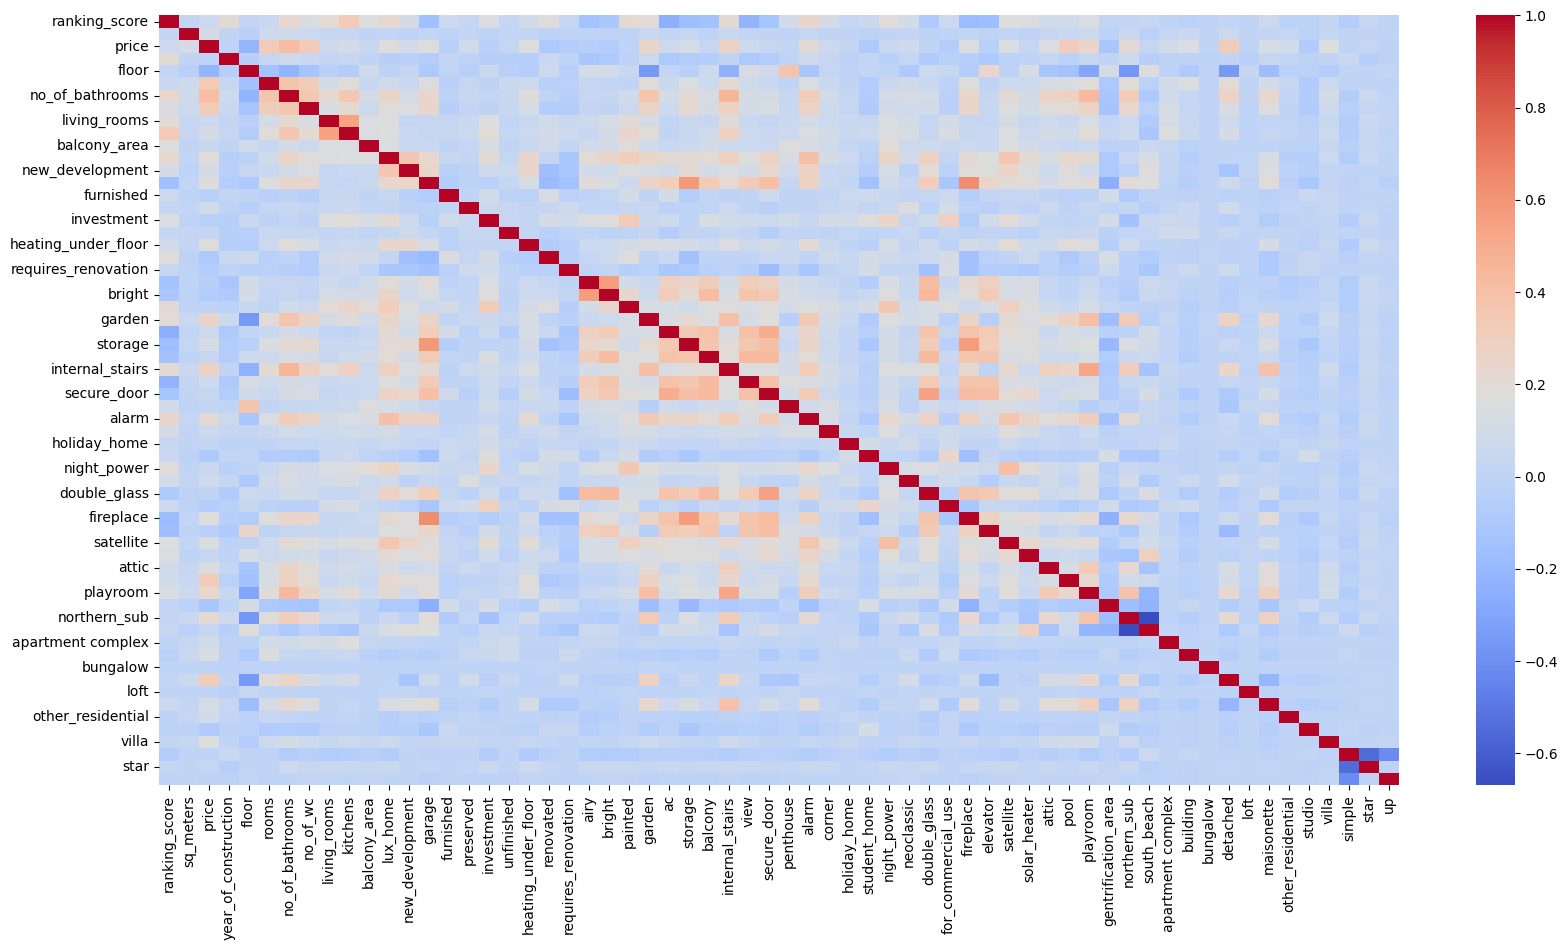

In [105]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

* We will build a function to find the correlated features.

In [106]:
def find_correlated_features(df, threshold):
    """
    This function will take the dataframe and the threshold as input and
    will return the correlated features.
    """
    corr = df.corr()
    corr_features = set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                colname = corr.columns[i]
                corr_features.add(colname)
    return corr_features

* We will set our threshold to 0.5.

In [107]:
correlated_features = find_correlated_features(df, 0.5)
correlated_features

{'bright',
 'double_glass',
 'fireplace',
 'kitchens',
 'playroom',
 'south_beach',
 'star',
 'storage'}

* The above features are highly correlated with other variables and can be dropped from the dataframe.
* We will not drop `star`, `south_beach` and `storage` since are part of the categorical columns we converted earlier to dummy variables.

In [108]:
correlated_features = list(correlated_features)
correlated_features

['double_glass',
 'playroom',
 'star',
 'south_beach',
 'fireplace',
 'kitchens',
 'bright',
 'storage']

In [109]:
df = df.drop(columns=['bright', 'playroom', 'fireplace', 'kitchens', 'double_glass', 'storage'], axis=1)

* Next, we will use a wrapper method to select the best features.
* We will use the `RandomForestRegressor` model to do that.

* We have our dataframe with only numerical values.
* First, we will split our dataset into `X` and `y` variables representing our explanatory and response variables respectively.
* Then, we will split our dataset into `train` and `test` sets.
* 20% of the dataset will be used for testing and 80% for training our models.

* Moreover, since our features are on different scales, we will scale them using the `StandardScaler` method and fitting the `StandardScaler` only on the training set.

* As a baseline model, we will use the `LinearRegression` model and fit it on the training set.

* We will model the logarithm of the price.

In [110]:
round(df['price'].describe(), 2)

count       15343.00
mean       594681.10
std        713523.38
min             0.00
25%        235000.00
50%        400000.00
75%        700000.00
max      25000000.00
Name: price, dtype: float64

* We will keep only entries whose value of price is greater than 0.

In [111]:
df = df[df['price'] > 0]

In [112]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41, shuffle=True)
print(f'The shape of the X_train is: {X_train.shape}')
print(f'The shape of the X_test is: {X_test.shape}')
print(f'The shape of the y_train is: {y_train.shape}')
print(f'The shape of the y_test is: {y_test.shape}')

The shape of the X_train is: (12272, 55)
The shape of the X_test is: (3069, 55)
The shape of the y_train is: (12272,)
The shape of the y_test is: (3069,)


In [113]:
def print_results(y_true, preds):
    """
    This function will take the actual values and the predicted values as input and
    will print the RMSE, MAE and MAPE.
    """

    print("RMSE:", sqrt(mean_squared_error(y_true, preds)))
    print("MAE:", mean_absolute_error(y_true, preds))
    print("MAPE:", mean_absolute_percentage_error(y_true, preds))

In [114]:
rf = RandomForestRegressor(random_state=41)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=41)

* See the feature importances in descending order of the `RandomForestRegressor` model.

In [115]:
features = X_train.columns
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key=lambda x: x[1], reverse=True)
f_i

[('sq_meters', 0.6331029492525726),
 ('year_of_construction', 0.08834344035461948),
 ('ranking_score', 0.03306011171700505),
 ('rooms', 0.022562873839532826),
 ('south_beach', 0.020901414282266495),
 ('no_of_bathrooms', 0.01995167028866507),
 ('no_of_wc', 0.01972257858957589),
 ('floor', 0.01639678924699583),
 ('pool', 0.015578876420497115),
 ('northern_sub', 0.013045131110914423),
 ('preserved', 0.007394986096867086),
 ('detached', 0.0073787901885479295),
 ('living_rooms', 0.0064509600761975434),
 ('airy', 0.005451332673219965),
 ('corner', 0.005321060506743287),
 ('ac', 0.004404921804617242),
 ('elevator', 0.0043087019009844406),
 ('garage', 0.004112439934740043),
 ('secure_door', 0.004047100695985591),
 ('view', 0.003994189012425506),
 ('balcony_area', 0.003970381270848919),
 ('alarm', 0.0038682938874458413),
 ('garden', 0.003471550657207561),
 ('lux_home', 0.003413045293683488),
 ('heating_under_floor', 0.0031648767215796685),
 ('attic', 0.0030976339797869927),
 ('internal_stairs',

* Plot the top 15 feature importances.

<BarContainer object of 15 artists>

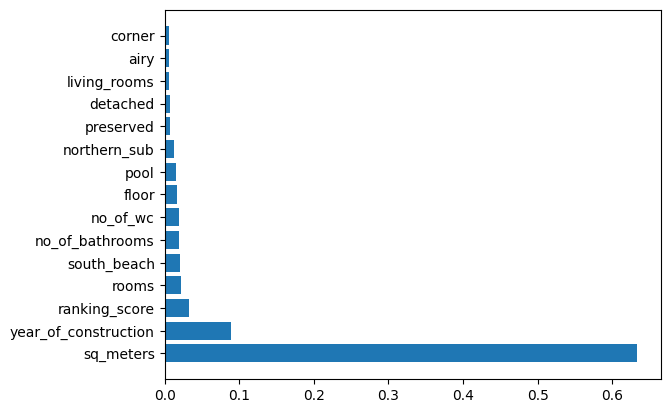

In [116]:
f_i = f_i[:15]
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

In [117]:
selected = [x[0] for x in f_i]
selected.append('price')
selected

['sq_meters',
 'year_of_construction',
 'ranking_score',
 'rooms',
 'south_beach',
 'no_of_bathrooms',
 'no_of_wc',
 'floor',
 'pool',
 'northern_sub',
 'preserved',
 'detached',
 'living_rooms',
 'airy',
 'corner',
 'price']

### Machine Learning Model

* Since we have selected the top 15 features, we will use them to train our model.
* From the description of the assignment, we know that we have to predict the price of a property.
* Also, we know that the product team wants to build an MVP (Minimum Viable Product) for the first version of the product, that will be used in beta.
* Due to the fact that we do not want to stall the product development and since we do not know if the feature will be launched, we will use a simple model such as the `LinearRegression` model.
* If the feature is launched, we will use a more complex model such as the `RandomForestRegressor` model.

In [118]:
df2 = df.copy()
df2 = df2[selected]
df2

,sq_meters,year_of_construction,ranking_score,rooms,south_beach,no_of_bathrooms,no_of_wc,floor,pool,northern_sub,preserved,detached,living_rooms,airy,corner,price
0,567,2005,47.0,4,0,0,0,1,0,1,0,0,0,1,0,200000
1,642,1992,134.7,5,0,4,1,0,0,1,0,1,1,0,1,550000
2,320,2009,71.0,2,0,2,1,0,0,1,0,1,0,1,0,500000
3,95,2007,122.0,3,0,1,1,1,0,1,0,0,0,0,0,230000
4,195,2007,126.7,4,0,1,2,0,0,1,0,0,0,0,0,370000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,80,1960,101.0,2,0,0,0,3,0,0,0,0,0,1,0,75000
15339,69,1975,103.5,2,0,0,0,2,0,0,0,0,0,1,0,70000
15340,75,1974,118.1,1,0,1,0,3,0,0,0,0,0,0,0,120000
15341,800,1930,78.7,1,0,0,0,0,0,0,0,0,0,0,0,600000


* We will model the logarithm of the price.

In [119]:
X = df2.drop('price', axis=1)
y = np.log(df2['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41, shuffle=True)
print(f'The shape of the X_train is: {X_train.shape}')
print(f'The shape of the X_test is: {X_test.shape}')
print(f'The shape of the y_train is: {y_train.shape}')
print(f'The shape of the y_test is: {y_test.shape}')

The shape of the X_train is: (12272, 15)
The shape of the X_test is: (3069, 15)
The shape of the y_train is: (12272,)
The shape of the y_test is: (3069,)


* Scaling the data and fitting the `LinearRegression` model.

In [120]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

* We will make the predictions on the test set and print the metrics.

In [121]:
preds = lm.predict(X_test_scaled)
preds = np.exp(preds)
y_test = np.exp(y_test)
temp = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
temp

,Actual,Predicted
13861,20000.0,109494.001355
2082,400000.0,369205.168605
8909,2000000.0,946939.299705
3232,150000.0,276829.440777
4590,165000.0,125590.894979
...,...,...
12487,450000.0,296820.412227
5259,80000.0,126929.657159
10832,250000.0,118658.004472
11626,1179000.0,736060.724735


Text(0.5, 1.0, 'Actual vs Predicted')

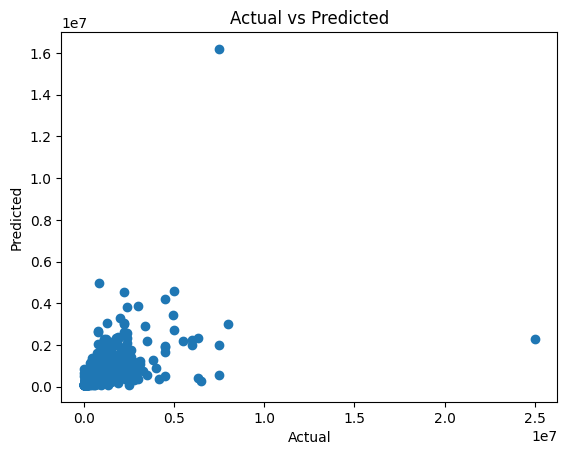

In [122]:
plt.figure()
plt.scatter(temp.Actual, temp.Predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [123]:
print_results(y_test, preds)

RMSE: 666167.0350075269
MAE: 250886.09444205518
MAPE: 687.5027739422281


* If I had more time for the assignment, I would try out the Part 2 of the Assignment.
* Also, on Part 3 I would spend more time on the feature selection part and try out other methods such as the `RFE` method and the `Lasso Regression` method.
* I would also try out other models such as the `RandomForestRegressor` model and the `XGBoost` model.
* Lastly, I would try to improve the model by doing some hyperparameter tuning.
